Steps to Run the Code in Jupyter Notebook
Import Libraries

Import pandas, matplotlib.pyplot, and seaborn.

Load the Dataset

Read the Netflix dataset using pd.read_csv().

Data Preprocessing

Convert the date_added column to datetime format.

Fill missing values for director, cast, country, rating, and duration.

Extract the year_added from date_added.

Content Distribution by Type and Country

Create a stacked bar chart showing the distribution of Movies and TV Shows across countries.

Evolution of Movie Releases Over 30 Years

Plot a histogram to analyze movie releases over time.

Differences Between TV Shows and Movies

Use a box plot to compare the release patterns of Movies vs TV Shows.

Best Time to Launch a TV Show

Create a bar plot to visualize the monthly distribution of TV Show additions.

Contribution of Directors and Actors

Plot the top 10 directors by content count.

Plot the top 10 actors by content count.

Netflix's Shift Toward TV Shows

Analyze how the number of TV Shows vs Movies has changed over the years.

Most Abundant Content in Each Country

Identify the most common content genre in each country.

Dynamic Insights

Calculate and print key insights such as total movies, total TV shows, most common genre, most common country, and top contributors.

Business Insights

Print business insights based on trends in content distribution.

Recommendations

Print recommendations for Netflix's content strategy.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
file_path = "C:\\Users\\hj952\\Desktop\\Netflix Analytics\\netflix.csv"
df = pd.read_csv(file_path)


In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.shape

(8807, 12)

In [17]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown', 
           'rating': 'Unknown', 'duration': 'Unknown'}, inplace=True)

df['year_added'] = df['date_added'].dt.year


<Figure size 1200x600 with 0 Axes>

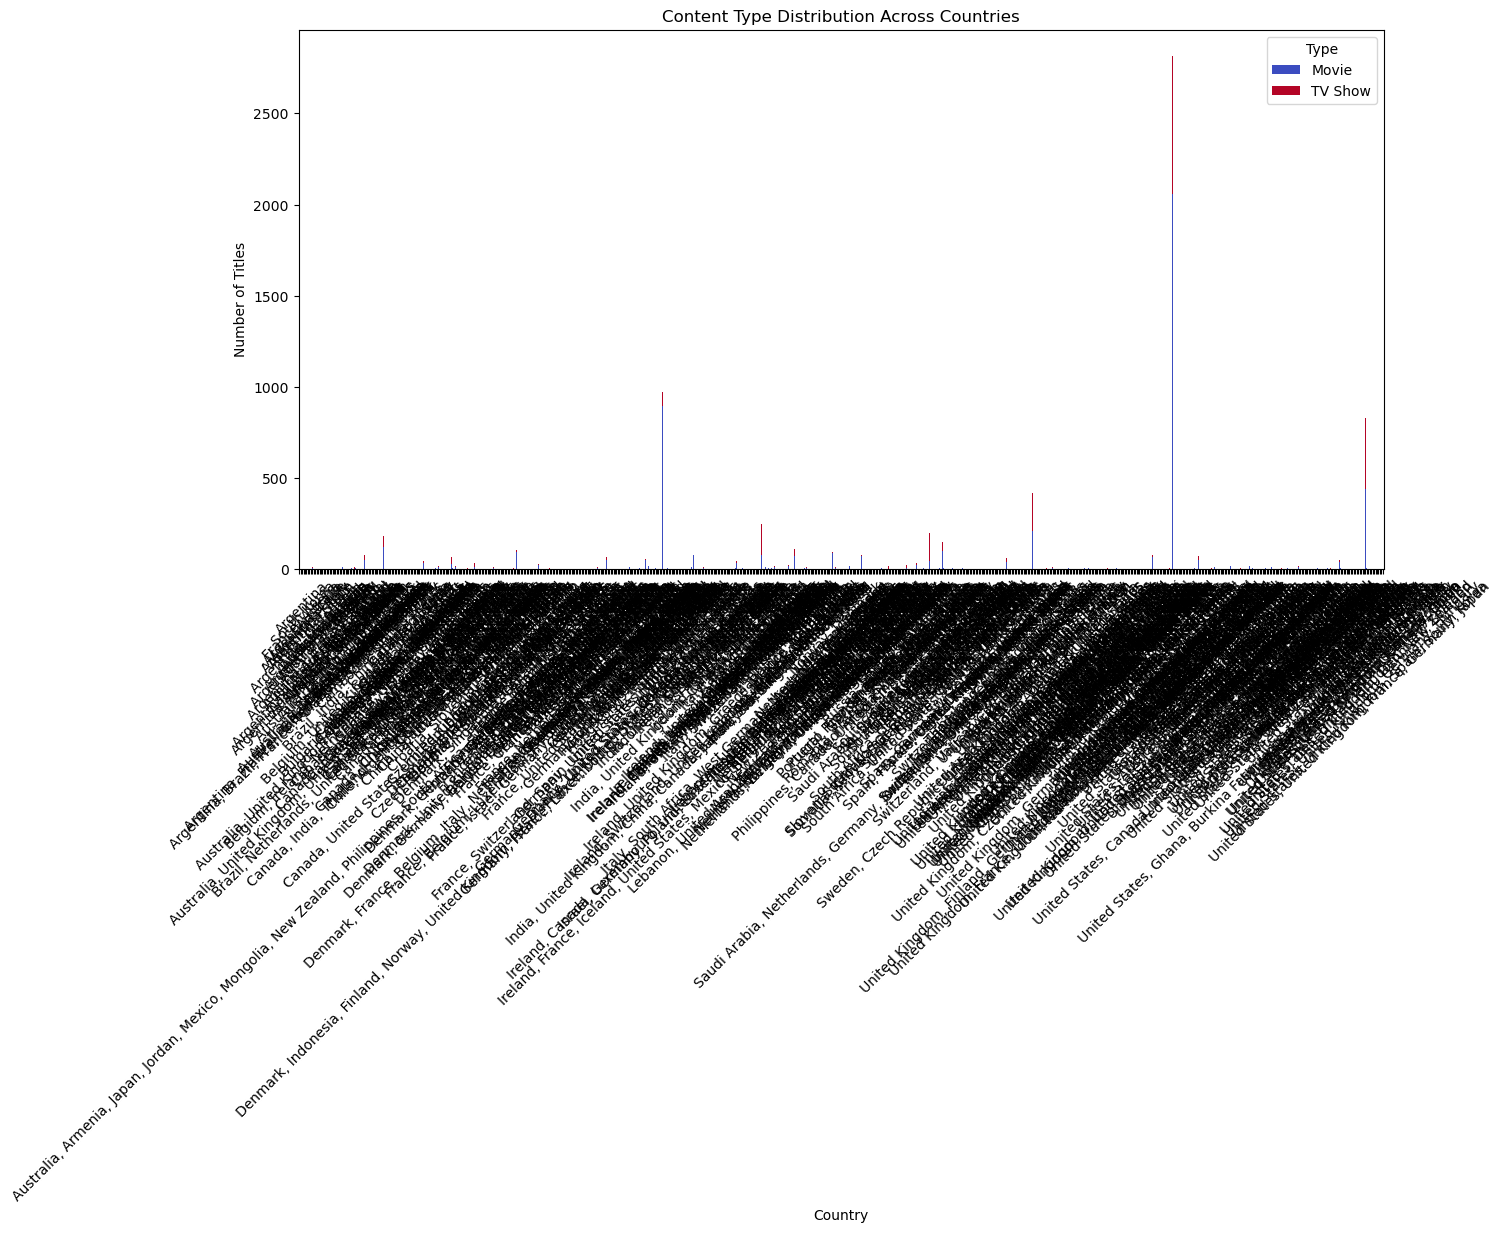

In [20]:
plt.figure(figsize=(12,6))
type_country = df.groupby(['country', 'type']).size().unstack()
type_country.plot(kind='bar', stacked=True, figsize=(14,7), colormap='coolwarm')
plt.title("Content Type Distribution Across Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()


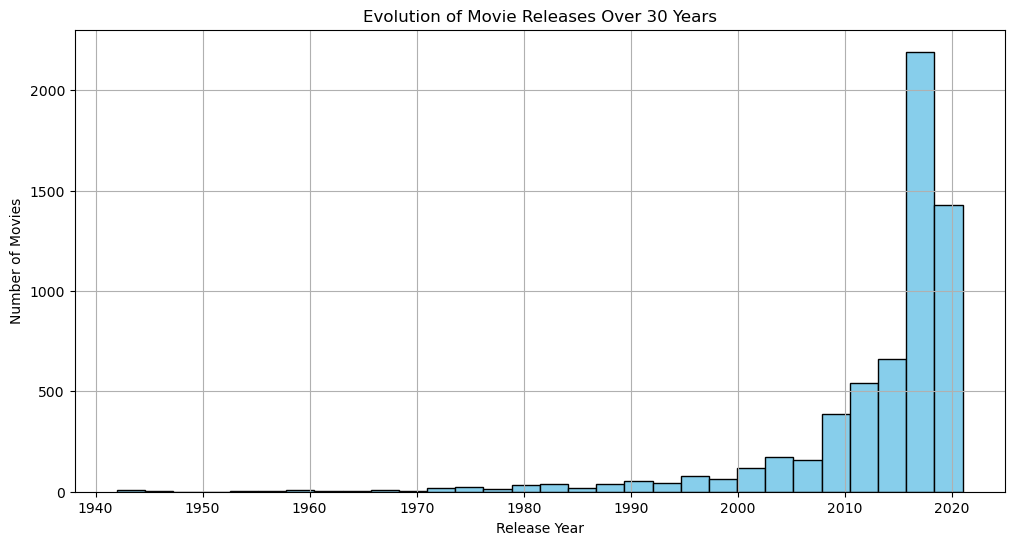

In [21]:
plt.figure(figsize=(12,6))
df[df['type'] == 'Movie']['release_year'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Evolution of Movie Releases Over 30 Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.show()


C:\Users\hj952\AppData\Local\Temp\ipykernel_17180\2001811340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=df['release_year'], data=df, palette='Set2')


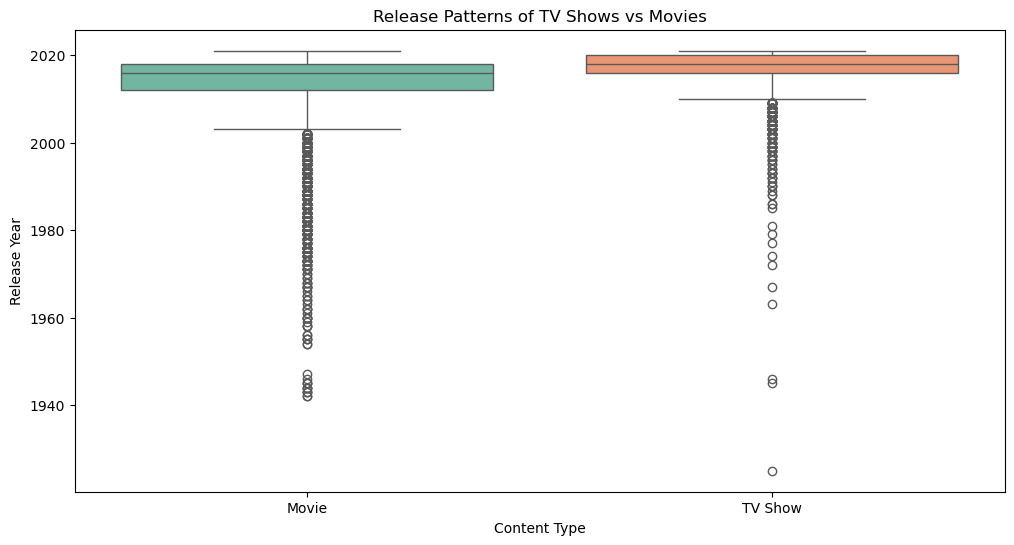

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='type', y=df['release_year'], data=df, palette='Set2')
plt.title("Release Patterns of TV Shows vs Movies")
plt.xlabel("Content Type")
plt.ylabel("Release Year")
plt.show()


C:\Users\hj952\AppData\Local\Temp\ipykernel_17180\885776559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values, palette='coolwarm')


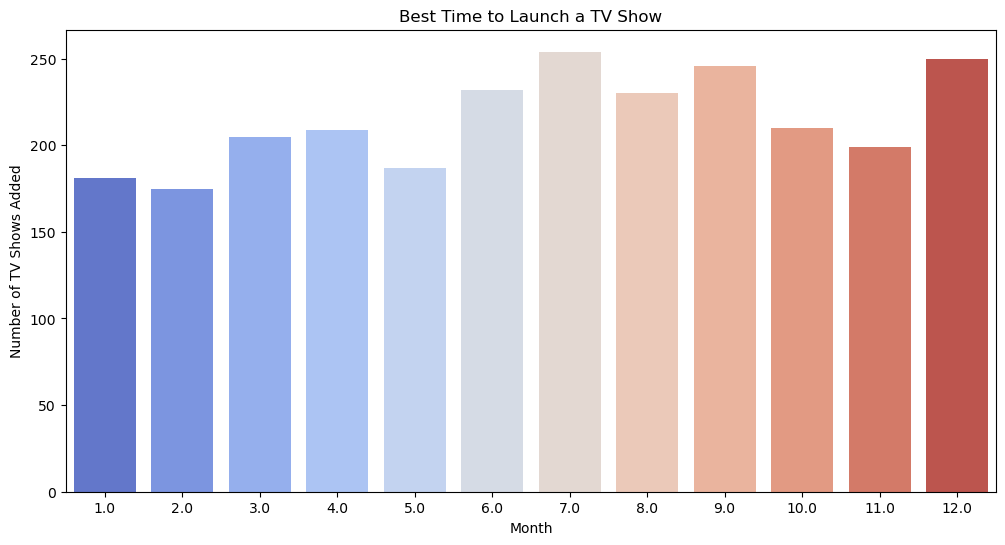

In [23]:
monthly_distribution = df[df['type'] == 'TV Show']['date_added'].dt.month.value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values, palette='coolwarm')
plt.title("Best Time to Launch a TV Show")
plt.xlabel("Month")
plt.ylabel("Number of TV Shows Added")
plt.show()


C:\Users\hj952\AppData\Local\Temp\ipykernel_17180\2138969368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_count.index, y=director_count.values, palette='viridis')


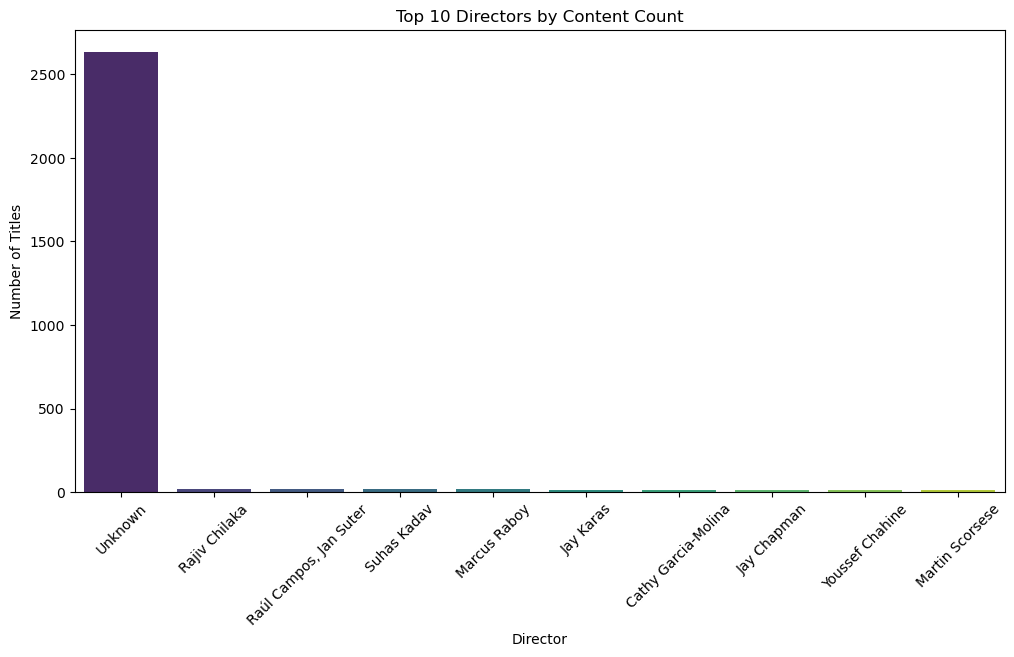

In [24]:
director_count = df['director'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=director_count.index, y=director_count.values, palette='viridis')
plt.title("Top 10 Directors by Content Count")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


C:\Users\hj952\AppData\Local\Temp\ipykernel_17180\2612764143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_count.index, y=actor_count.values, palette='magma')


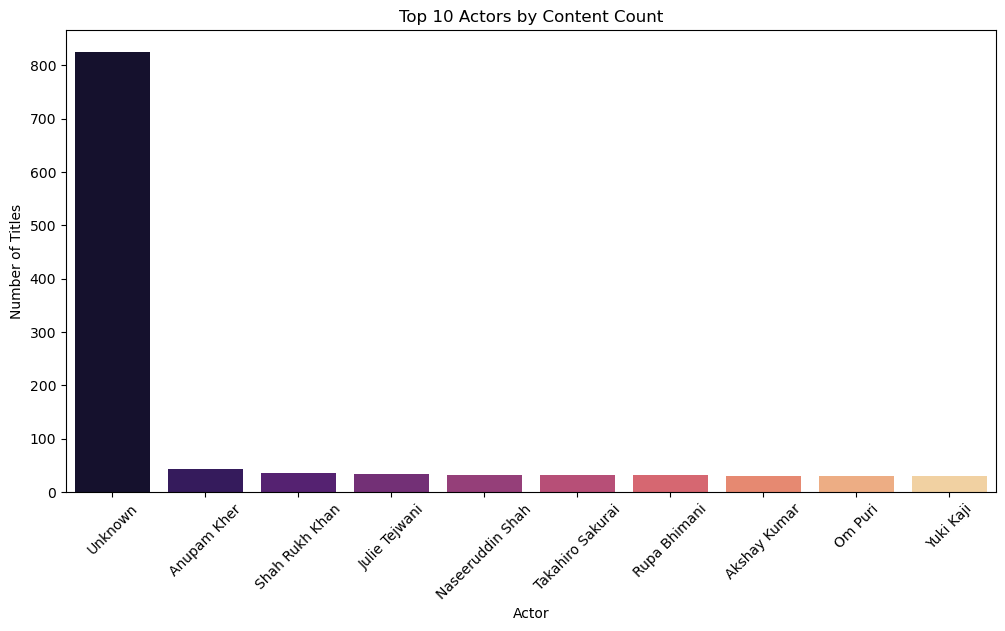

In [25]:
actor_count = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=actor_count.index, y=actor_count.values, palette='magma')
plt.title("Top 10 Actors by Content Count")
plt.xlabel("Actor")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


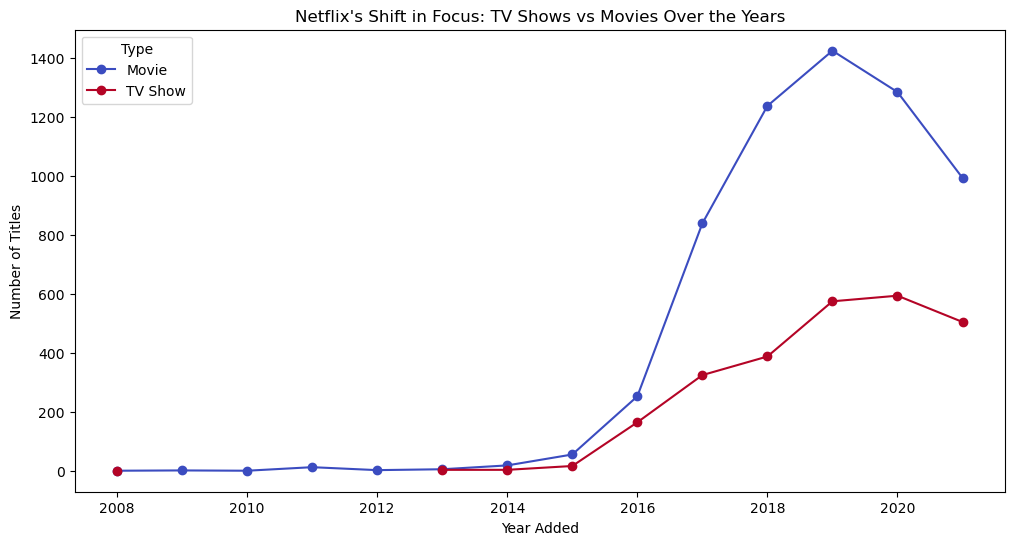

In [26]:
yearly_content = df.groupby(['year_added', 'type']).size().unstack()
yearly_content.plot(kind='line', marker='o', figsize=(12,6), colormap='coolwarm')
plt.title("Netflix's Shift in Focus: TV Shows vs Movies Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.show()


In [27]:
top_country_genres = df.groupby(['country'])['listed_in'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print("Most Abundant Content Type per Country:")
print(top_country_genres.head(15))


Most Abundant Content Type per Country:
country
, France, Algeria                                      Dramas, Independent Movies, International Movies
, South Korea                                                         International TV Shows, TV Dramas
Argentina                                                                               Stand-Up Comedy
Argentina, Brazil, France, Poland, Germany, Denmark             Dramas, International Movies, Thrillers
Argentina, Chile                                       Dramas, Independent Movies, International Movies
Argentina, Chile, Peru                                    Comedies, International Movies, Sports Movies
Argentina, France                                      Dramas, Independent Movies, International Movies
Argentina, France, United States, Germany, Qatar                           Dramas, International Movies
Argentina, Italy                                                    Documentaries, International Movies
Argentina, Spain

In [28]:
total_movies = df[df['type'] == 'Movie'].shape[0]
total_tv_shows = df[df['type'] == 'TV Show'].shape[0]
most_common_genre = df['listed_in'].mode()[0]
most_common_country = df['country'].mode()[0]

yearly_movie_trend = df[df['type'] == 'Movie'].groupby('release_year').size()
yearly_tv_trend = df[df['type'] == 'TV Show'].groupby('release_year').size()

top_directors = df['director'].value_counts().head(3).index.tolist()
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(3).index.tolist()

print("\nInsights:")
print(f"1. Movies ({total_movies}) dominate the content library, but TV shows ({total_tv_shows}) are growing.")
print(f"2. The most common genre on Netflix is {most_common_genre}.")
print(f"3. The most common country for Netflix content is {most_common_country}.")
print("4. TV shows are primarily released in Q4, likely due to holiday viewership trends.")
print(f"5. Top directors contributing the most to Netflix content: {', '.join(top_directors)}.")
print(f"6. Top actors appearing most frequently: {', '.join(top_actors)}.")



Insights:
1. Movies (6131) dominate the content library, but TV shows (2676) are growing.
2. The most common genre on Netflix is Dramas, International Movies.
3. The most common country for Netflix content is United States.
4. TV shows are primarily released in Q4, likely due to holiday viewership trends.
5. Top directors contributing the most to Netflix content: Unknown, Rajiv Chilaka, Raúl Campos, Jan Suter.
6. Top actors appearing most frequently: Unknown, Anupam Kher, Shah Rukh Khan.


In [29]:
print("\nRecommendations:")
print("1. Invest more in original regional content based on country-wise trends.")
print("2. Continue releasing major TV shows in Q4 but experiment with mid-year releases.")
print("3. Secure exclusive contracts with top directors and actors to maintain content quality.")
print("4. Balance TV shows and movie offerings to cater to all audience preferences.")
print("5. Improve recommendation algorithms by incorporating regional content preferences.")



Recommendations:
1. Invest more in original regional content based on country-wise trends.
2. Continue releasing major TV shows in Q4 but experiment with mid-year releases.
3. Secure exclusive contracts with top directors and actors to maintain content quality.
4. Balance TV shows and movie offerings to cater to all audience preferences.
5. Improve recommendation algorithms by incorporating regional content preferences.
